In [1]:
import os
import json
import datetime
import numpy as np

filenames = [dset for dset in os.listdir() if 'datelist' in dset]

def get_data(dataset):
    process = lambda x: (datetime.datetime.strptime(x[0],'%Y-%m-%d'),int(x[1].strip(' ')))
    data = []
    with open(dataset,'r') as file:
        for line in file:
            item = line.strip('\n').split(',')
            data.append(process(item))
    return np.array(data)

In [2]:
wapo = get_data(filenames[0])

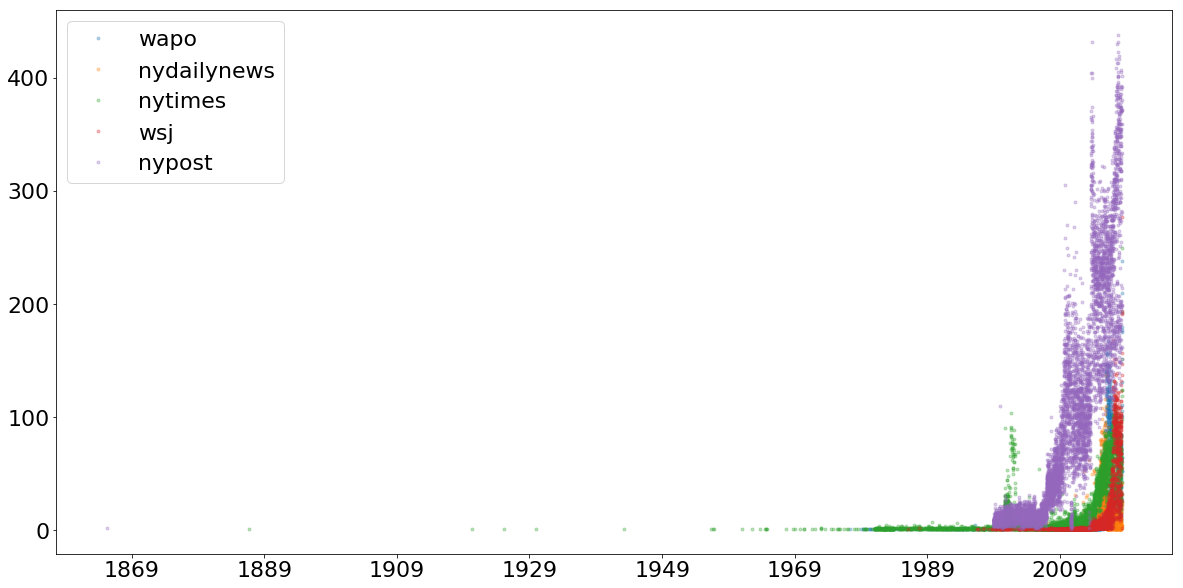

In [9]:
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
for file in filenames:
    data = get_data(file)
    plt.plot(data[:,0],data[:,1],'.',alpha = 0.3)
    
plt.legend([name.replace('_datelist.csv','') for name in filenames],fontsize=22)
plt.savefig('pubdates_all.png')

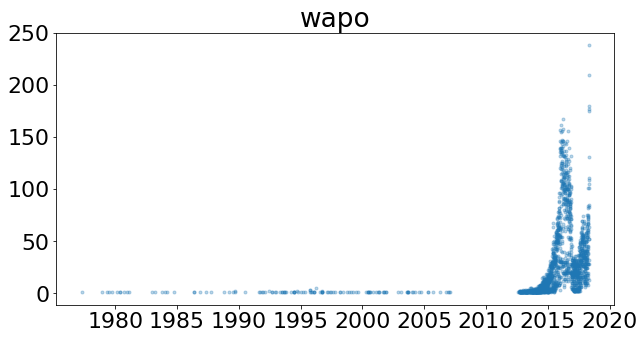

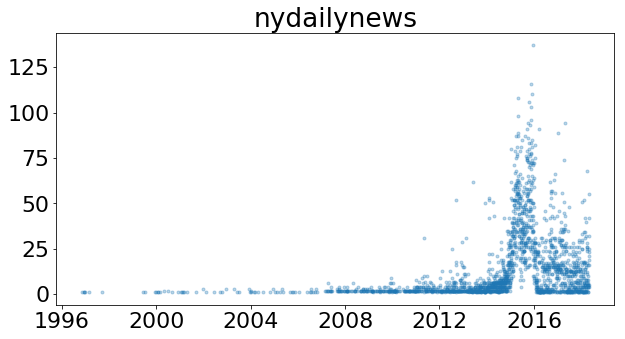

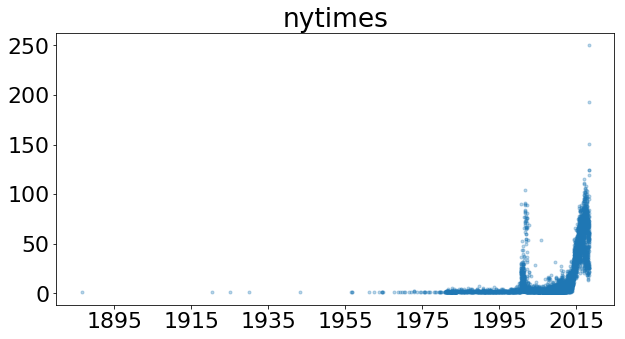

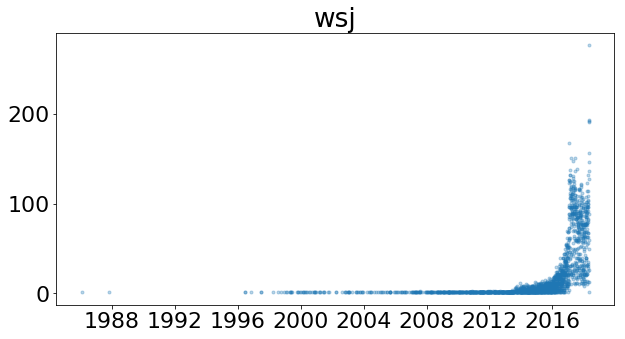

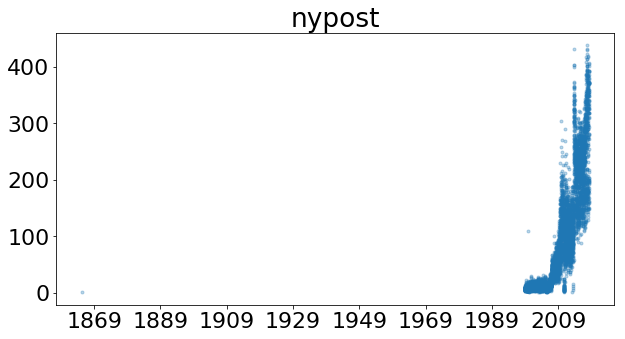

In [10]:
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 22})


for file in filenames:
    data = get_data(file)
    plt.figure(figsize=(10,5))
    plt.plot(data[:,0],data[:,1],'.',alpha = 0.3)
    plt.title(file.replace('_datelist.csv',''))
    plt.savefig('pubdates_'+file.replace('_datelist.csv',''+'.png'))

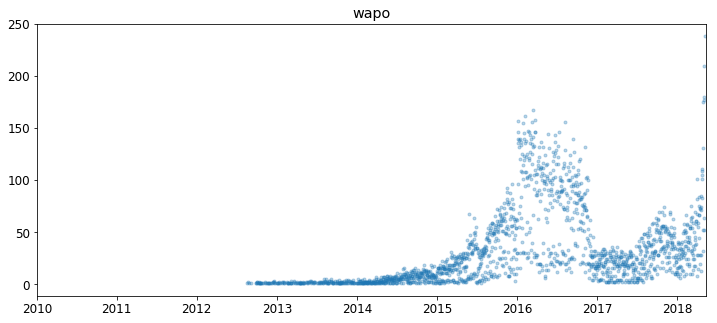

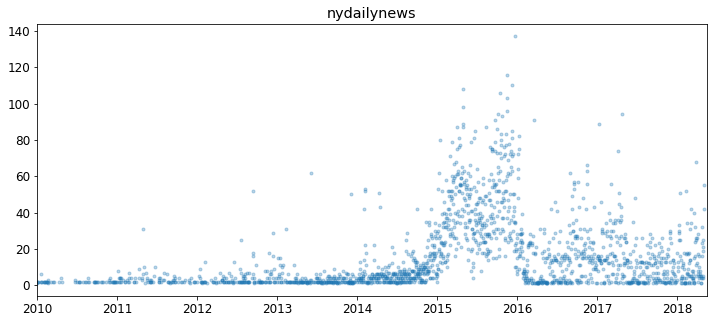

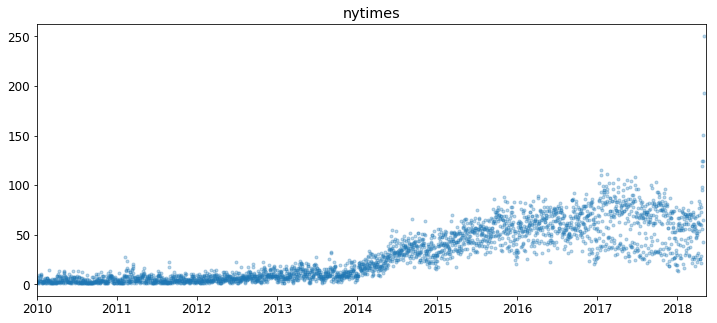

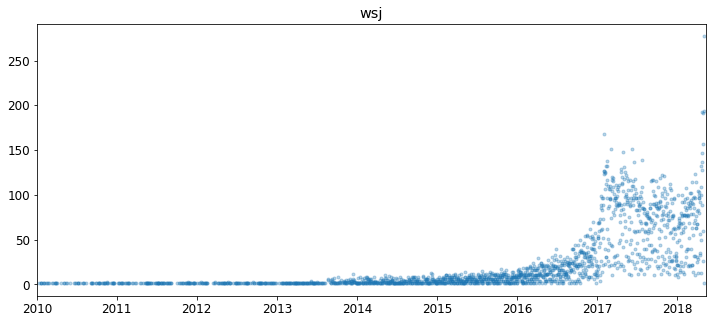

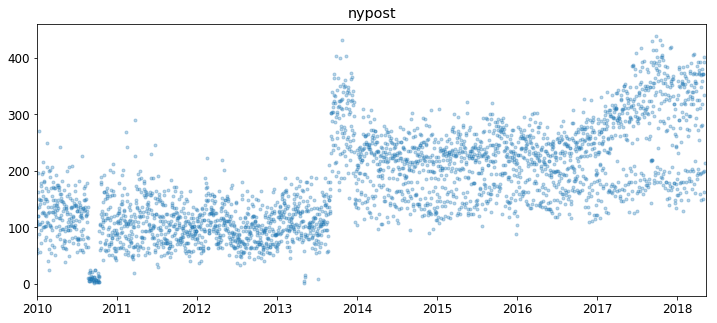

In [21]:
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 12})


for file in filenames:
    data = get_data(file)
    plt.figure(figsize=(12,5))
    plt.plot(data[:,0],data[:,1],'.',alpha = 0.3)
    plt.xlim([datetime.datetime(2010,1,1),datetime.datetime(2018,5,15)])
    plt.title(file.replace('_datelist.csv',''))
    plt.savefig('pubdates_xlimited'+file.replace('_datelist.csv',''+'.png'))